In [124]:
from sklearn.datasets import fetch_openml
import numpy as np


In [130]:

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int) 


print(X)
print(y)
print("type:", y.dtype)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[5 0 4 ... 4 5 6]
type: int64


In [126]:
X = X / 255

In [131]:
y_new = np.zeros(y.shape)
y_new[np.where(y == 0)[0]] = 1
y = y_new


print(y)
print("shape:", y.shape)
print("type:", y.dtype)
print("min/max:", y.min(), y.max())
print("Unique labels:", np.unique(y)[:10])

[0. 1. 0. ... 0. 0. 0.]
shape: (70000,)
type: float64
min/max: 0.0 1.0
Unique labels: [0. 1.]


In [132]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [133]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

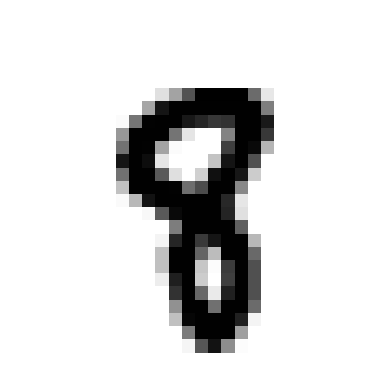

[0.]


In [134]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

In [ ]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [138]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    epsilon = 1e-8
    Y_hat = np.clip(Y_hat, epsilon, 1 - epsilon)
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [139]:
learning_rate = 1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

print(Y)


[[0. 1. 0. ... 0. 0. 0.]]


In [ ]:

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  3.4509684792640396


/var/folders/9m/5yl447m538l3dw65wfhnx6xh0000gn/T/ipykernel_66752/2848360560.py:2: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))


Epoch 100 cost:  0.21552197455248825
Epoch 200 cost:  0.21914281482262513
Epoch 300 cost:  0.21337314431345297
Epoch 400 cost:  0.19526915947285198


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))

[[10000]]


/Users/jackhenry/Library/CloudStorage/OneDrive-UniversityofCambridge/Coding/Neural-Network-from-scratch/.scratch_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

